In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from lifelines import KaplanMeierFitter
import seaborn as sns
import numpy as np

In [21]:
# Load the dataset
file_path = "data/Cleaned_Cancer_Project.csv"
df = pd.read_csv(file_path)
# Display the first few rows
df.head()

,Race,Sex,Year,Age,In the natural position of diagnosis,Localized,Regional,Distant,Unknown Stage,Total Documented Cases,Blanks/ Meets NO requirements as whole
0,White,Male/Female,2000,0,1,3,1,0,0,5,0
1,White,Male/Female,2000,1,0,2,0,0,0,2,0
2,White,Male/Female,2000,2,0,43,13,0,0,56,1
3,White,Male/Female,2000,3,0,247,72,14,4,337,14
4,White,Male/Female,2000,4,8,484,179,45,21,737,42


In [13]:
df.columns


Index(['Race', 'Sex', 'Year', 'Age', 'In the natural position of diagnosis',
       'Localized', 'Regional', 'Distant', 'Unknown Stage',
       'Total Documented Cases', 'Blanks/ Meets NO requirements as whole'],
      dtype='object')

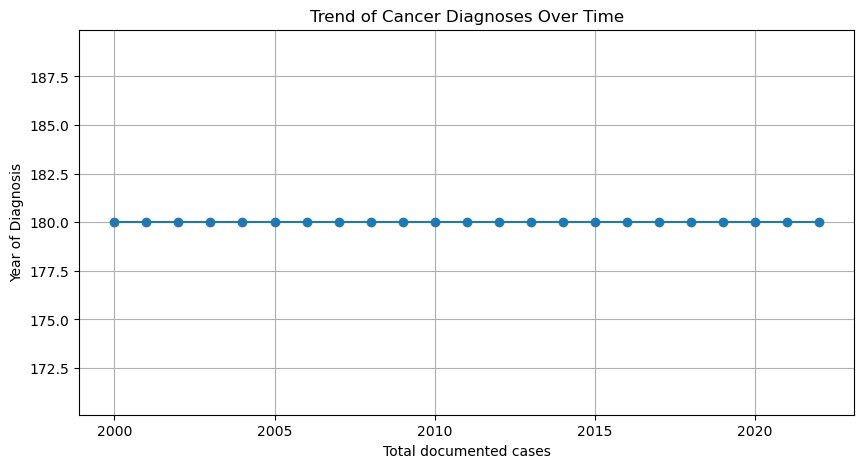

In [22]:
df["Year"].value_counts().sort_index().plot(kind="line", marker="o", figsize=(10, 5))
plt.xlabel("Total documented cases")
plt.ylabel("Year of Diagnosis")
plt.title("Trend of Cancer Diagnoses Over Time")
plt.grid(True)
plt.show()

In [8]:
# Replace these with the appropriate column names from your dataset
time_col = "Survival_Time"  # Placeholder for survival time column
event_col = "Event_Status"  # Placeholder for event/censoring column (1 = event, 0 = censored)

# Check if the required columns are present
if time_col in df.columns and event_col in df.columns:
    # Create Kaplan-Meier fitter instance
    kmf = KaplanMeierFitter()

    # Fit the model
    kmf.fit(durations=df[time_col], event_observed=df[event_col])

    # Plot the survival curve
    kmf.plot_survival_function()
    plt.title("Kaplan-Meier Survival Curve")
    plt.xlabel("Time")
    plt.ylabel("Survival Probability")
    plt.grid(True)
    plt.show()
else:
    print(f"Required columns '{time_col}' and '{event_col}' are not present in the dataset.")

Required columns 'Survival_Time' and 'Event_Status' are not present in the dataset.


In [11]:
df["Year"].value_counts().sort_index()

Year
2000    180
2001    180
2002    180
2003    180
2004    180
2005    180
2006    180
2007    180
2008    180
2009    180
2010    180
2011    180
2012    180
2013    180
2014    180
2015    180
2016    180
2017    180
2018    180
2019    180
2020    180
2021    180
2022    180
Name: count, dtype: int64

In [15]:
# Create a sample DataFrame (Ensure df exists before running this)
if 'df' not in globals():
    df = pd.DataFrame({'Age': np.random.randint(20, 90, size=100)})  # Example data

# Assign survival time based on age (Modify with actual survival data if available)
np.random.seed(42)  # For reproducibility
df["Survival_Time"] = np.random.randint(1, 120, size=len(df))  # Survival time in months

# Assign event occurrence (Modify with actual death/censoring data)
df["Event"] = np.random.choice([0, 1], size=len(df), p=[0.3, 0.7])  # 1 = death, 0 = censored

# Display the first few rows of the DataFrame
print(df.head())

    Race          Sex  Year  Age  In the natural position of diagnosis  \
0  White  Male/Female  2000    0                                     1   
1  White  Male/Female  2000    1                                     0   
2  White  Male/Female  2000    2                                     0   
3  White  Male/Female  2000    3                                     0   
4  White  Male/Female  2000    4                                     8   

   Localized  Regional  Distant  Unknown Stage  Total Documented Cases  \
0          3         1        0              0                       5   
1          2         0        0              0                       2   
2         43        13        0              0                      56   
3        247        72       14              4                     337   
4        484       179       45             21                     737   

   Blanks/ Meets NO requirements as whole  Survival_Time  Event  
0                                       0   

In [17]:
data = {
    "Year": np.tile(np.arange(2000, 2010), 4),
    "Count": np.random.randint(50, 500, size=40),
    "Race": ["White"] * 10 + ["Black"] * 10 + ["Asian"] * 10 + ["Hispanic"] * 10,
    "Sex": ["Male"] * 5 + ["Female"] * 5 + ["Male"] * 5 + ["Female"] * 5 + ["Male"] * 5 + ["Female"] * 5 + ["Male"] * 5 + ["Female"] * 5,
}

grouped_data = pd.DataFrame(data)

# Display first few rows
print(grouped_data.head())

   Year  Count   Race   Sex
0  2000     82  White  Male
1  2001    325  White  Male
2  2002    219  White  Male
3  2003    189  White  Male
4  2004    406  White  Male


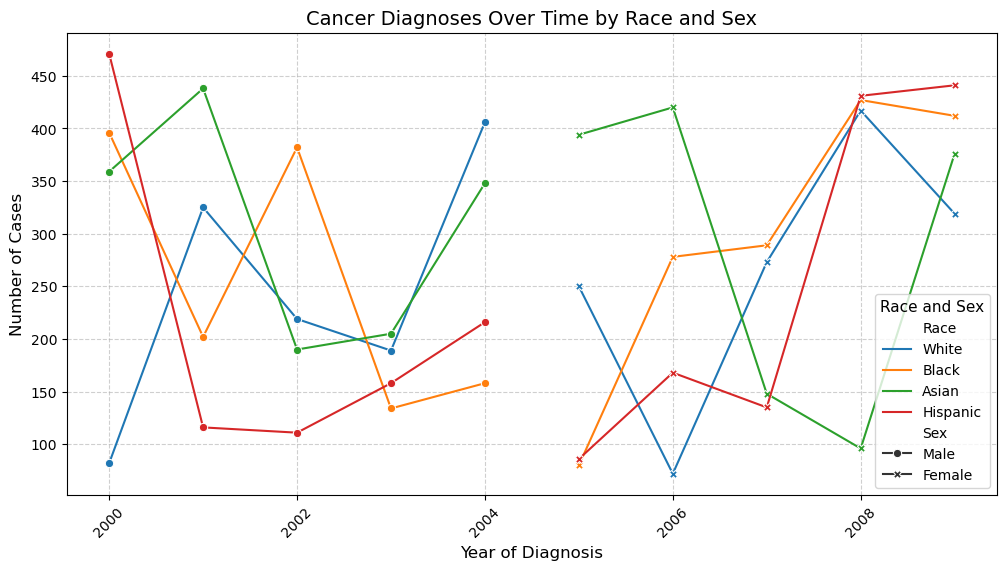

In [18]:
# Ensure grouped_data exists before plotting
if 'grouped_data' not in globals() and 'grouped_data' not in locals():
    raise ValueError("Error: 'grouped_data' DataFrame is not defined. Ensure you have the correct dataset.")

if not isinstance(grouped_data, pd.DataFrame):
    raise TypeError("Error: 'grouped_data' is not a DataFrame. Ensure correct data format.")

plt.figure(figsize=(12, 6))

# Improved line plot for clarity
sns.lineplot(data=grouped_data, x="Year", y="Count", hue="Race", style="Sex", markers=True, dashes=False)

# Formatting and labels
plt.title("Cancer Diagnoses Over Time by Race and Sex", fontsize=14)
plt.xlabel("Year of Diagnosis", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Race and Sex", fontsize=10, title_fontsize=11)
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()